# Explotary Analysis - Dario Placencio

"At fetch, we are monitoring the number of the scanned receipts to our app on a daily base as one of our KPIs. From business standpoint, we sometimes need to predict the possible number of the scanned receipts for a given future month.

The following link provides the number of the observed scanned receipts each day for the year 2021. Based on this prior knowledge, please develop an algorithm which can predict the approximate number of the scanned receipts for each month of 2022."

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv('data_daily.csv')

# Basic Check

In [3]:
# check the data
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [4]:
# check the data types
df.dtypes

# Date           object
Receipt_Count     int64
dtype: object

In [5]:
# check the shape of the data
df.shape

(365, 2)

In [6]:
# check the missing values
df.isnull().sum()

# Date           0
Receipt_Count    0
dtype: int64

In [7]:
# check the unique values
df.nunique()

# Date           365
Receipt_Count    365
dtype: int64

# Checking the distribution of the Receipt_Count

In [8]:
# check the summary
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,Receipt_Count
count,365.000
mean,8826566.052
std,782008.894
min,7095414.000
25%,8142874.000
50%,8799249.000
75%,9476970.000
max,10738865.000


- The count of data points is 365, representing daily counts the 2021 year.
- The average number of receipts scanned daily is 8,826,566. 
- The standard deviation is 782,008.
- The minimum and maximum counts are 7,095,414 and 10,738,865 respectively. 

In [9]:
# Counting frequency of Receipt_Count
freq = pd.cut(df['Receipt_Count'], bins=20).value_counts(sort=False)
print(freq)

Receipt_Count
(7091770.549, 7277586.55]     4
(7277586.55, 7459759.1]       4
(7459759.1, 7641931.65]      10
(7641931.65, 7824104.2]      25
(7824104.2, 8006276.75]      23
(8006276.75, 8188449.3]      30
(8188449.3, 8370621.85]      22
(8370621.85, 8552794.4]      30
(8552794.4, 8734966.95]      28
(8734966.95, 8917139.5]      20
(8917139.5, 9099312.05]      26
(9099312.05, 9281484.6]      24
(9281484.6, 9463657.15]      25
(9463657.15, 9645829.7]      27
(9645829.7, 9828002.25]      22
(9828002.25, 10010174.8]     21
(10010174.8, 10192347.35]    12
(10192347.35, 10374519.9]    10
(10374519.9, 10556692.45]     1
(10556692.45, 10738865.0]     1
Name: count, dtype: int64


- When the Receipt_Count data is divided into 20 bins to visualize the frequency distribution, the intervals show that the receipt counts are somewhat evenly distributed across the range, with the maximum frequency (30) observed in the intervals (8006276.75, 8188449.3] and (8370621.85, 8552794.4].
- The intervals at the extreme ends, specifically (10374519.9, 10556692.45] and (10556692.45, 10738865.0], have the least frequency, each with only 1 day falling into those categories.

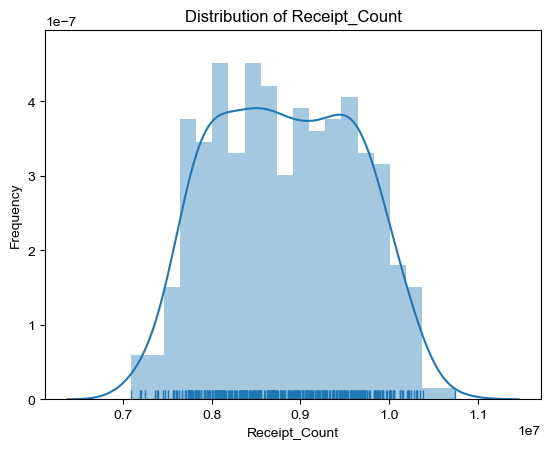

In [10]:
# Calculate the distribution of the Receipt_Count, into 20 bins with seaborn
sns.distplot(df['Receipt_Count'], bins=20, kde=True, rug=True)
sns.set_style('whitegrid')
plt.title('Distribution of Receipt_Count')
plt.xlabel('Receipt_Count')
plt.ylabel('Frequency')
plt.show();

In [11]:
# Print the skewness and kurtosis for Receipt_Count
print("Skewness: %f" % df['Receipt_Count'].skew())
print("Kurtosis: %f" % df['Receipt_Count'].kurt())

Skewness: 0.033606
Kurtosis: -0.974022


- The distribution of Receipt_Count represents a near-symmetrical distribution of the daily counts of scanned receipts over a year.
- The counts are somewhat evenly spread with a majority lying in the middle ranges, reflected on the value of Skewness (measure of symmetry, the smaller the more symetric). 
- The distribution has a flatter peak and fewer extreme values than a typical normal distribution, suggesting that most of the daily counts are concentrated around the average, and there are relatively fewer extremely high or low values. This is a characteristic of a platykurtic distribution (thin-tailed, meaning that outliers are infrequent).

![Alt text](image.png)

# Checking for Trends

In [12]:
# Print column names
print(df.columns)

Index(['# Date', 'Receipt_Count'], dtype='object')


In [13]:
# Convert the data type of Date to datetime
df['# Date'] = pd.to_datetime(df['# Date'])

In [14]:
# Change name of column
df.rename(columns={'# Date': 'Date'}, inplace=True)

In [15]:
# Set Date as index
df.set_index('Date', inplace=True)

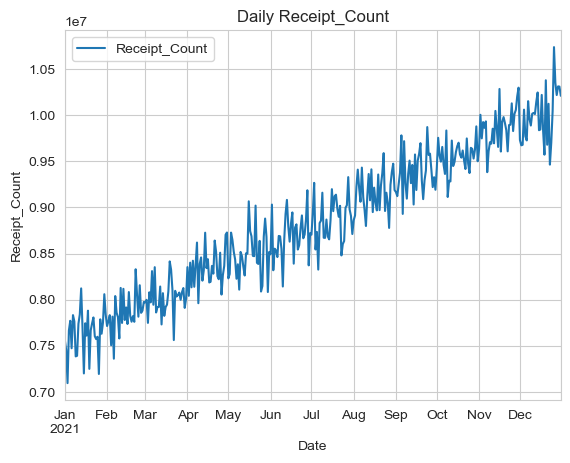

In [16]:
# Plot the time series in your DataFrame
df.plot()
plt.title('Daily Receipt_Count')
plt.xlabel('Date')
plt.ylabel('Receipt_Count')
plt.show();

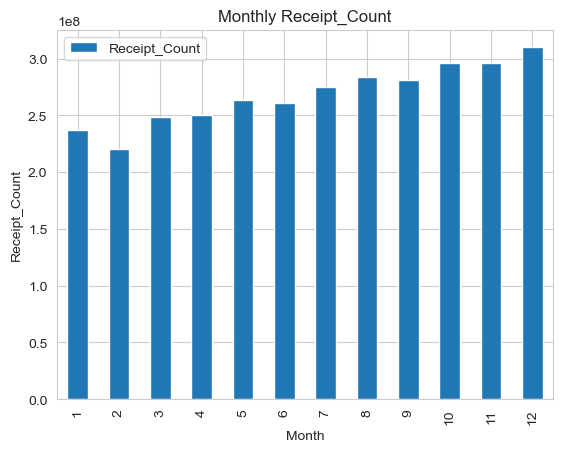

In [17]:
# Plot groupin the total by month, include a trend line, and change the color
df.groupby(df.index.month).sum().plot(kind='bar')
plt.title('Monthly Receipt_Count')
plt.xlabel('Month') 
plt.ylabel('Receipt_Count')  
plt.show();

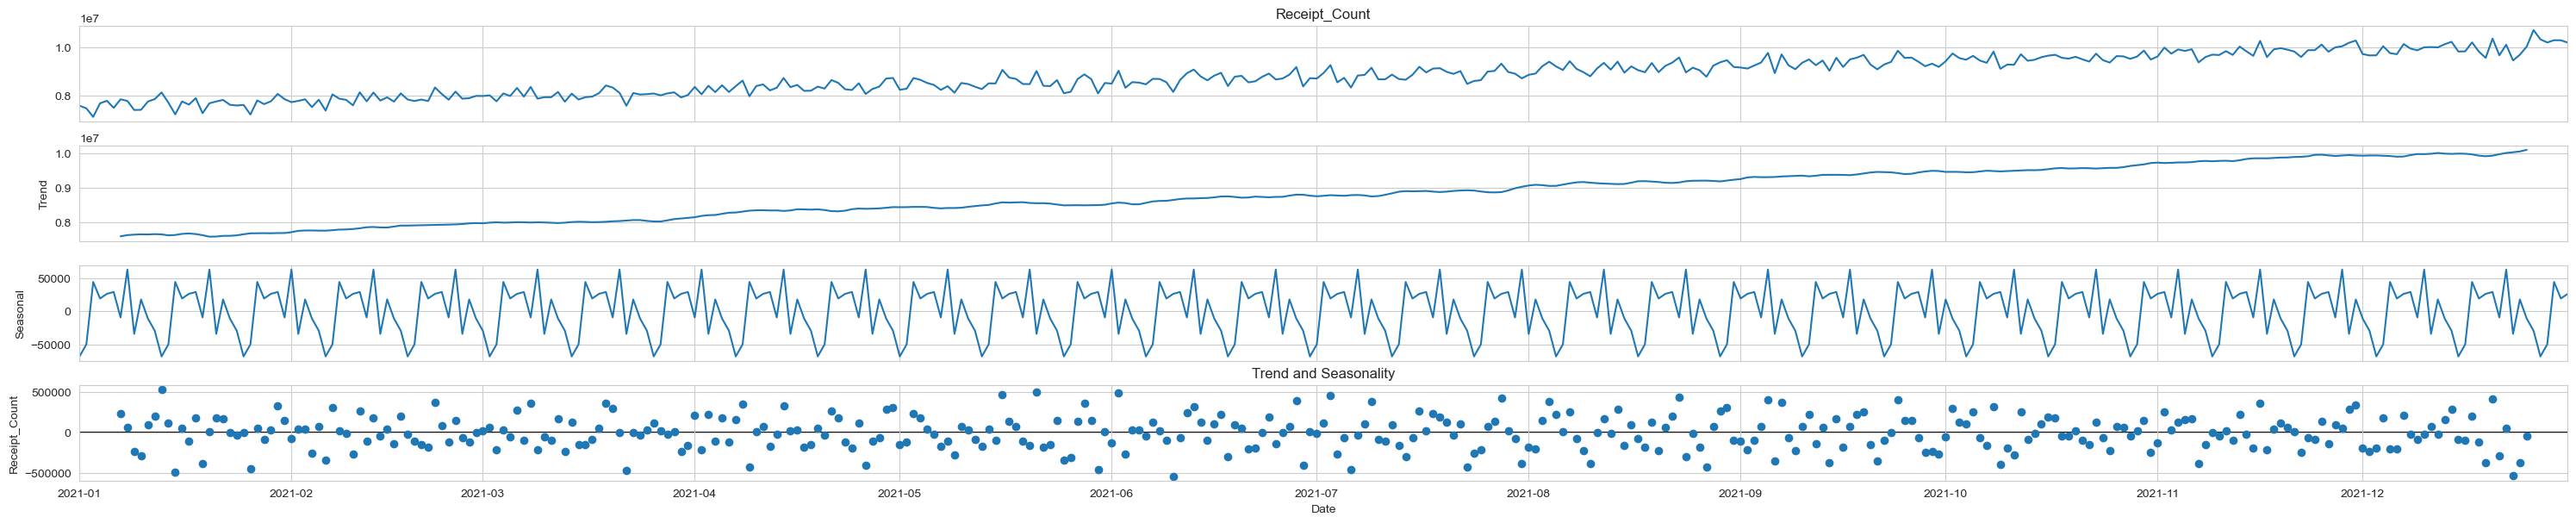

In [33]:
# Trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Receipt_Count'], model='additive', filt=None, period=12)

# Plot decomposition
decomp.plot()
# make plot wider
plt.rcParams["figure.figsize"] = (30,6)
plt.title('Trend and Seasonality')
plt.xlabel('Date')
plt.ylabel('Receipt_Count')
plt.show();

In [36]:
# Print the values of the seasonal component by month
print(decomp.seasonal.groupby(decomp.seasonal.index.month).mean())

Date
1     -231.816
2     1300.436
3     -879.530
4      -65.350
5     -231.816
6    -2030.802
7     4003.989
8    -4176.377
9     3182.429
10   -2450.082
11    3132.954
12   -2175.963
Name: seasonal, dtype: float64


The seasonal component (recurring pattern or fluctuation in data that follows a regular, predictable cycle or seasonal pattern over a specific period of time, such as a year), reveals the cyclical nature of the Receipt_Count data across the months. There's notable fluctuation, with some months like July and November showing substantial increases, while others like August and June indicate significant drops.

# Suggested Approach

To select a model for forecasting, it's essential to understand the characteristics of the data. Here are some observations:

- The data is a time series with a daily frequency, counting 365 data points for a year.	
- The target variable assembles a platykurtic distribution, based on the negative kurtosis value (measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution).
- The distribution is near-symmetrical, with a skewness value close to zero.
- The data exhibits seasonality, with the number of receipts scanned varying across the months.
- The data has a clear trend, with the number of receipts scanned increasing over time.
- Extreme values are rare, with the majority of the data concentrated around the average.
- The positive trend presented, might continue in the future, as the number of receipts scanned increases over time, but at a slower rate based on the nature of app usage. 
- The data belong to 2021, which was a really great year for fetch user growth. Source: 
    - https://www.prnewswire.com/news-releases/fetch-rewards-app-surpasses-5-million-daily-active-users-301608564.html
    - https://www.cbinsights.com/research/fetch-rewards-competitors-ibotta-checkout-51-getupside-rakuten-rewards-honey-wikibuy-dosh-drop/#:~:text=Wisconsin%2Dbased%20Fetch%20Rewards%20enables,base%20to%2013M%20in%202021.

Based on the previous observations, the following models are suggested:

- Autoregressive Integrated Moving Average (ARIMA): Popular time series forecasting method that captures the autoregressive and moving average components of the series. It works best when data exhibit a clear trend or seasonality. Given the daily data, there might be weekly seasonality or other cyclical patterns that ARIMA can capture.
- Seasonal Decomposition of Time Series (STL): If there's strong seasonality in the data (e.g., patterns that repeat weekly or monthly), then STL combined with a forecasting model (like ARIMA on the residuals) can be effective.

- Depending on the accuracy that these models can achieve, it might be worth exploring stacking or ensembling them to improve the performance.


Another candidate for stacking or ensembling is a neural network model, which can be effective for time series forecasting, like:

- Long Short-Term Memory Networks (LSTM): LSTM is a type of recurrent neural network (RNN) that can capture long-term dependencies and patterns in time series data. Given that the data is mesokurtic, LSTM can potentially capture the nuances in the series if there's enough historical data to train on.             

But on this case the low amount of data points should not allow to train a LSTM model with great quality, so it is not a good candidate for this case.